<a href="https://colab.research.google.com/github/kd-badlabs/animated-disco/blob/master/Natural%20language%20processing%20(NLP)%20Project%20-%20Hotel%20Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [75]:
df = pd.read_csv('/Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


# Data Cleaning and EDA

In [76]:
# check data shape
df.shape

(515738, 17)

The dataset has 515,738 rows and 17 columns

In [77]:
# check missing values
df.isna().mean()

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
days_since_review                             0.000000
lat                                           0.006337
lng                                           0.006337
dtype: float64

lat and lon have 0.006% missing values which are pretty small. I will leave as is.

In [78]:
# check duplicates
df.duplicated().sum()

526

The dataset has 527 duplicated rows. Since the dataset doesn't have a unqiue identifier and 527 is pretty small so I will leave as is

In [79]:
# remove days from “days_since_review” and convert the variable to numeric
df['days_since_review'] = df.days_since_review.str.split(' ',expand=True)[0]
df['days_since_review']=df['days_since_review'].astype('int')

In [80]:
# Convert Review_Date to datetime
df['Review_Date'] = df['Review_Date'].astype('datetime64')

In [81]:
# To check whether we can extract some useful info from "Tags" 
df.Tags.unique()

array(["[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']",
       "[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']",
       "[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']",
       ...,
       "[' Leisure trip ', ' Solo traveler ', ' Superior Double Room with Garden View ', ' Stayed 1 night ', ' Submitted from a mobile device ']",
       "[' Business trip ', ' Solo traveler ', ' Superior Double Room with Garden View ', ' Stayed 2 nights ']",
       "[' Leisure trip ', ' Family with young children ', ' Standard Double or Twin Room ', ' Stayed 10 nights ']"],
      dtype=object)

In [82]:
# create binary feature for business trip and leisure trip
df['Business_Trip']=df['Tags'].map(lambda x: 1 if ' Business trip ' in x else 0)
df['Leisure_Trip']=df['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)

In [83]:
df['Leisure_Trip'].value_counts()

1    417778
0     97960
Name: Leisure_Trip, dtype: int64

In [84]:
df['Business_Trip'].value_counts()

0    432799
1     82939
Name: Business_Trip, dtype: int64

Majority of reviewers had a Leisure_Trip

In [85]:
df['Stays'] = df['Tags'].map(lambda x: 1 if f' Stayed 1 night ' in x else 2 if f' Stayed 2 nights ' in x else 3 if f' Stayed 3 nights ' in x
                                 else 4 if f' Stayed 4 nights ' in x else 5 if f' Stayed 5 nights ' in x else 0)


In [86]:
df.Stays.value_counts(normalize=True)

1    0.375472
2    0.259700
3    0.185794
4    0.092716
0    0.045901
5    0.040418
Name: Stays, dtype: float64

4% people stayed more than 5 nights, most people stayed 1-2 days.

In [87]:
df['Stays']

0         0
1         4
2         3
3         3
4         2
         ..
515733    5
515734    2
515735    4
515736    3
515737    2
Name: Stays, Length: 515738, dtype: int64

In [88]:
df['Stays'] = np.where(df.Stays <=2,1,0)

In [89]:
df['Stays'].value_counts()

1    351255
0    164483
Name: Stays, dtype: int64

In [90]:
df.rename({'Stays':'Stay_less_than_2_days'},axis=1,inplace=True)

In [91]:
# Regroup variables into numerical and categorical and plot them out to check the distributions. 
# Since there are so many distinct values in feature "Negative_Review","Positive_Review" and "Tages" for EDA purposes, I'll drop them for now
# Drop lat and lng from numerical_var 
numerical_var = df.select_dtypes(['float64','int64'])
categorical_var = df.select_dtypes('object').drop(['Negative_Review','Positive_Review','Tags'],axis=1)

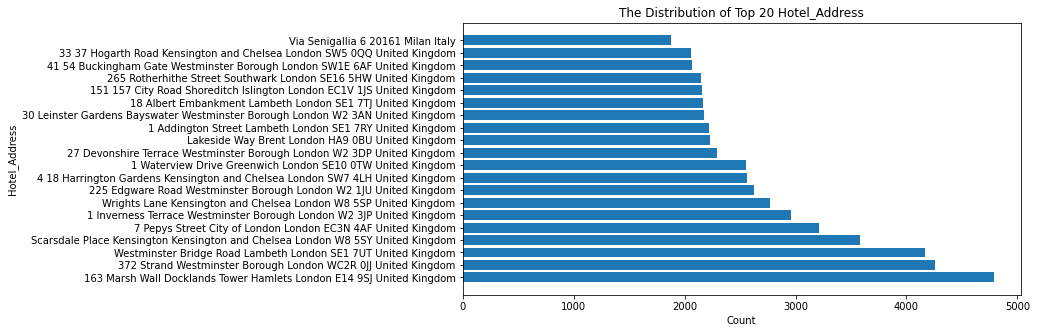

Breakdown
163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
1 Inverness Terrace Westminster Borough London W2 3JP United Kingdom              2958
Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom                  2768
225 Edgware Road Westminster Borough London W2 1JU United Kingdom                 2628
4 18 Harrington Gardens Kensington and Chelsea London SW7 4LH United Kingdom      2565
1 Waterview Drive Greenwich London SE10 0TW United Kingdom                        2551
27 Devonshire Terrace Westminster Borough London W2 3DP United Kingdom            2288
Lakeside Way Brent London HA9 0BU

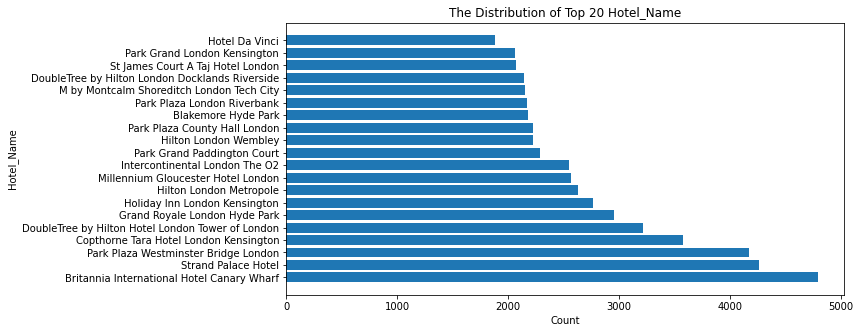

Breakdown
Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Park Grand Paddington Court                          2288
Hilton London Wembley                                2227
Park Plaza County Hall London                        2223
Blakemore Hyde Park                                  2178
Park Plaza London Riverbank                          2167
M by Montcalm Shoreditch London Tech City            2155
DoubleTree by Hilton London Docklands Riverside      2147
St J

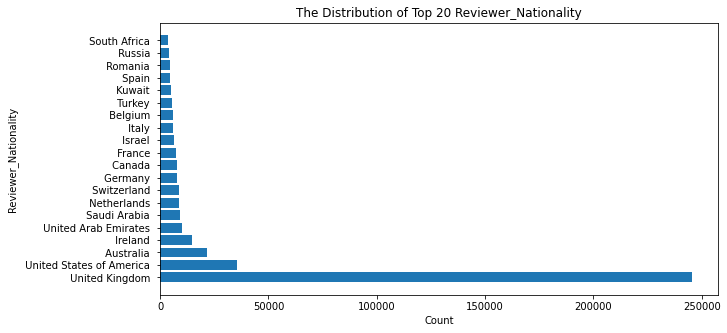

Breakdown
 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
 Kuwait                         4920
 Spain                          4737
 Romania                        4552
 Russia                         3900
 South Africa                   3821
Name: Reviewer_Nationality, dtype: int64
**************************************************


In [92]:
# Top 20 most common values
for variables in categorical_var:
    cat_cnt = categorical_var[variables].value_counts().sort_values(ascending=False).head(20)
    plt.figure(figsize=(10,5))
    plt.barh(cat_cnt.index,cat_cnt.values)
    plt.xlabel('Count')
    plt.ylabel(f'{variables}')
    plt.title(f'The Distribution of Top 20 {variables}')
    plt.show()
    print('Breakdown')
    print(cat_cnt)
    print('*'*50)

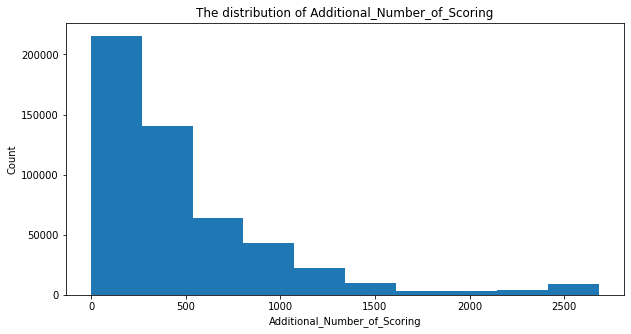

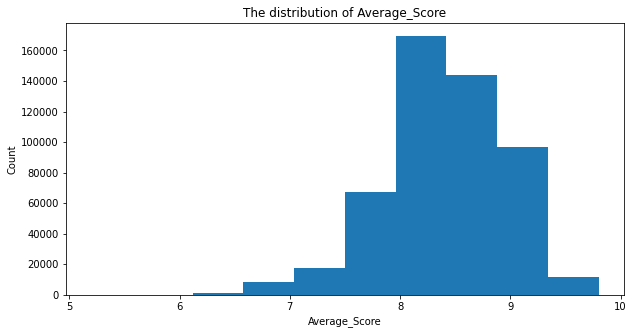

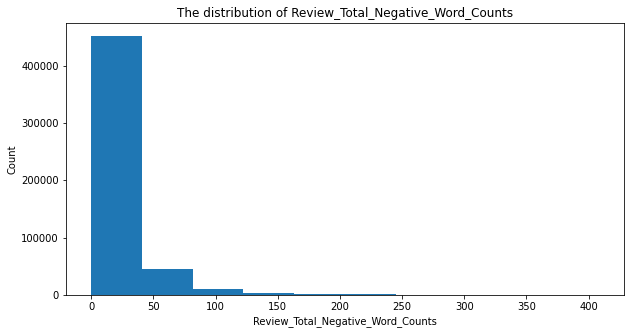

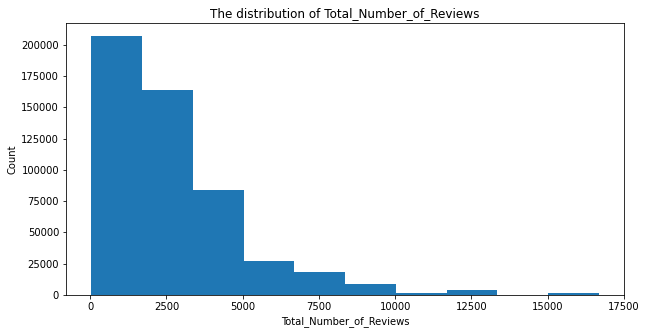

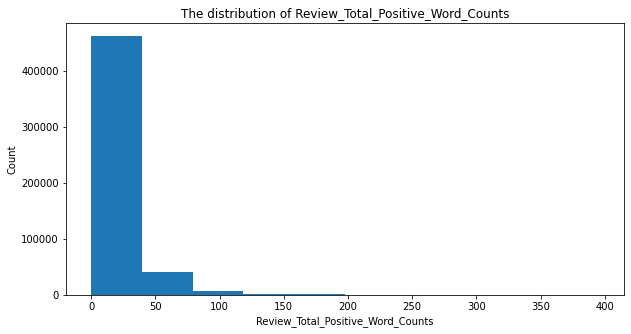

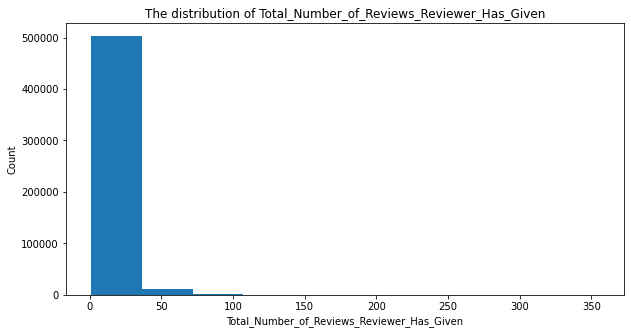

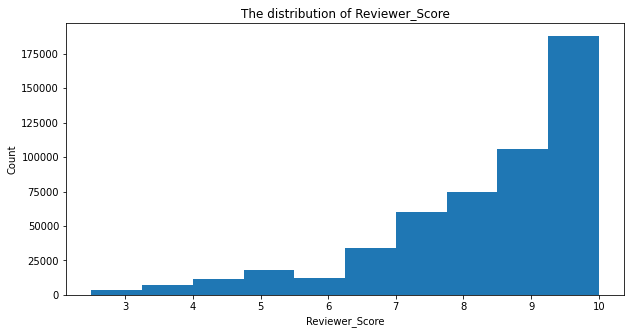

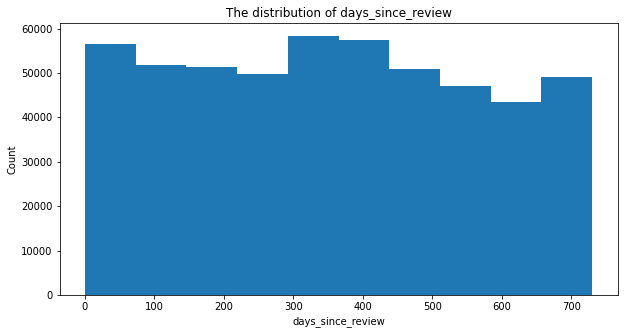

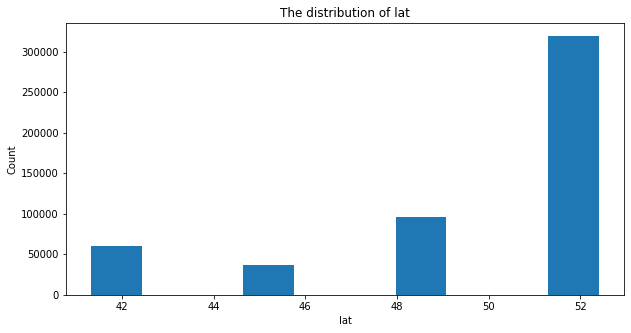

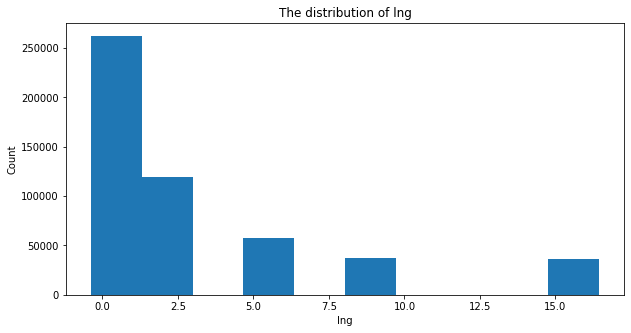

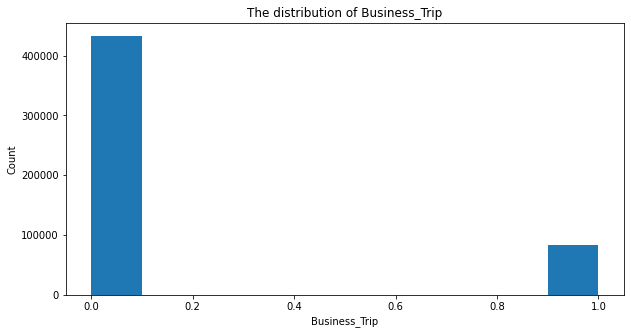

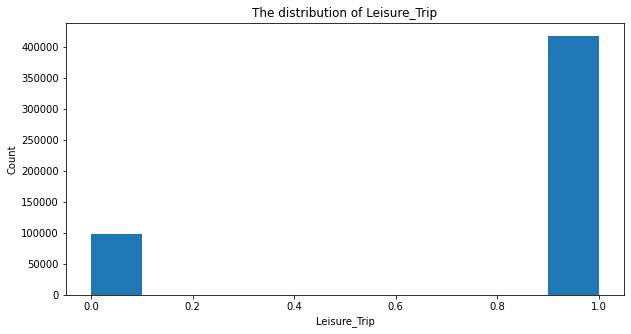

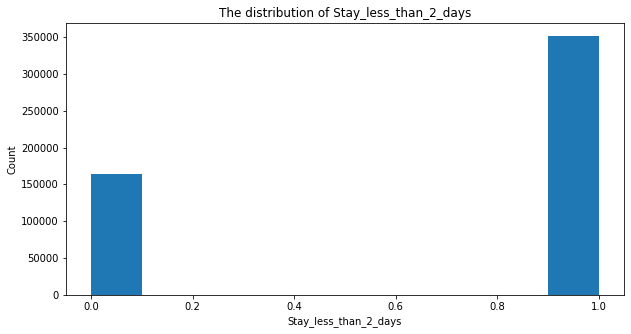

In [93]:
# Check the distribution for numerical variables
for variables in numerical_var:
    plt.figure(figsize=(10,5))
    plt.hist(numerical_var[variables])
    plt.xlabel(f'{variables}')
    plt.ylabel('Count')
    plt.title(f'The distribution of {variables}')
    plt.show()


The review scores are mostly positive but that could cause issue to our model since we have less negative reviews to train our model

# Feature Engineering

In [94]:
#Drop irrelevant features
df.drop(['Hotel_Address','Review_Date','Hotel_Name','Reviewer_Nationality','Tags','lat','lng'],axis=1,inplace=True)

In [95]:
df.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Business_Trip,Leisure_Trip,Stay_less_than_2_days
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,0,0,1,1
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,0,0,1,0
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,3,0,1,0
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,3,0,1,0
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,10,0,1,1


Convert the Reviewer_Score column into a binary column.

In [96]:
df['Reviewer_Score'] = np.where(df.Reviewer_Score>=8,1,0)

In [97]:
df.Reviewer_Score.value_counts()

1    335646
0    180092
Name: Reviewer_Score, dtype: int64

The dataset is greatly inbalanced so I will need to resample the dataset to balance the data

In [98]:
df_1 = df[df.Reviewer_Score ==1].sample(180092)

In [99]:
df_0 = df[df.Reviewer_Score ==0]

In [100]:
df = pd.concat([df_1,df_0],ignore_index=True)

In [101]:
df.Reviewer_Score.value_counts()

1    180092
0    180092
Name: Reviewer_Score, dtype: int64

Now the dataset is balanced

The positive review "No Negative" and the negative review "No Positive" could be misleading, so I will remove these reviews from my data

In [102]:
df.Negative_Review.replace('No Negative','',inplace=True)

In [103]:
df.Positive_Review.replace('No Positive','',inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360184 entries, 0 to 360183
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                360184 non-null  int64  
 1   Average_Score                               360184 non-null  float64
 2   Negative_Review                             360184 non-null  object 
 3   Review_Total_Negative_Word_Counts           360184 non-null  int64  
 4   Total_Number_of_Reviews                     360184 non-null  int64  
 5   Positive_Review                             360184 non-null  object 
 6   Review_Total_Positive_Word_Counts           360184 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  360184 non-null  int64  
 8   Reviewer_Score                              360184 non-null  int64  
 9   days_since_review                           360184 non-null  int64  
 

The only categorical variables remaining are text data

In [105]:
df['reviews']=df.Positive_Review+df.Negative_Review
df.drop(['Positive_Review','Negative_Review'],axis=1,inplace=True)

In [106]:
# define X and y
X = df.reviews
y = df['Reviewer_Score']

In [107]:
# Split the data into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [108]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

Use TF-IDF Vectorizer to vectorize text

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
bagofwords = TfidfVectorizer(min_df=10, stop_words='english',max_features=1500)
X_train_transformed =  bagofwords.fit_transform(X_train) 
X_test_transformed = bagofwords.transform(X_test)

In [110]:
X_train = pd.DataFrame(X_train_transformed.toarray(),columns= bagofwords.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [111]:
X_test = pd.DataFrame(X_test_transformed.toarray(),columns= bagofwords.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Modeling

I'm planning to build the following model:
* Logistic Regression
* Decision Tree
* Random Forest
* Naive Bayes
* XGBoost

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

XGBClassifier

In [113]:
xgboost_model = XGBClassifier().fit(X_train,y_train)
print('The train score is:', xgboost_model.score(X_train,y_train))            
print('The test score is:', xgboost_model.score(X_test,y_test))


The train score is: 0.7174371747683717
The test score is: 0.7152217368771748


Logistic_Regression

In [114]:
from sklearn.model_selection import GridSearchCV
logistic_regression_model = LogisticRegression(solver='lbfgs',max_iter=1000)
param_grid = dict(C=[.001,0.1,1,10])
grid = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.7651470794758258
LogisticRegression(C=0.1, max_iter=1000)


Refit the model with optimal C 0.1

In [115]:
logistic_regression_model = LogisticRegression(solver='lbfgs',C=1,max_iter=1000)
logistic_regression_model.fit(X_train,y_train)
print('The train score is:', logistic_regression_model.score(X_train,y_train))            
print('The test score is:', logistic_regression_model.score(X_test,y_test))

The train score is: 0.7691965985531158
The test score is: 0.767777818908714


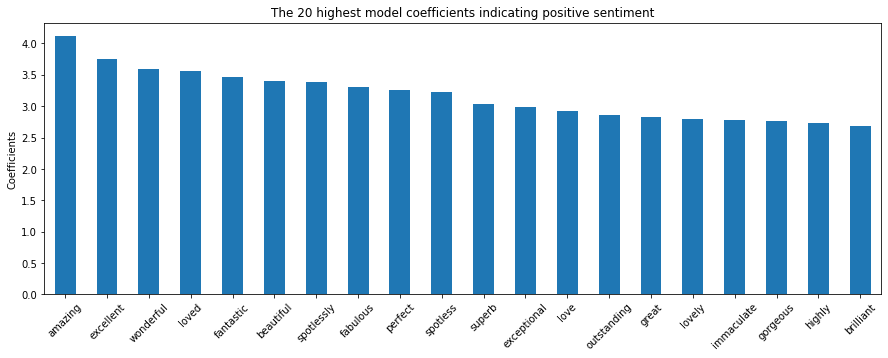

In [116]:
word_counts = pd.DataFrame(
    {"coefficients": logistic_regression_model.coef_[0]},
    index=X_train.columns
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()


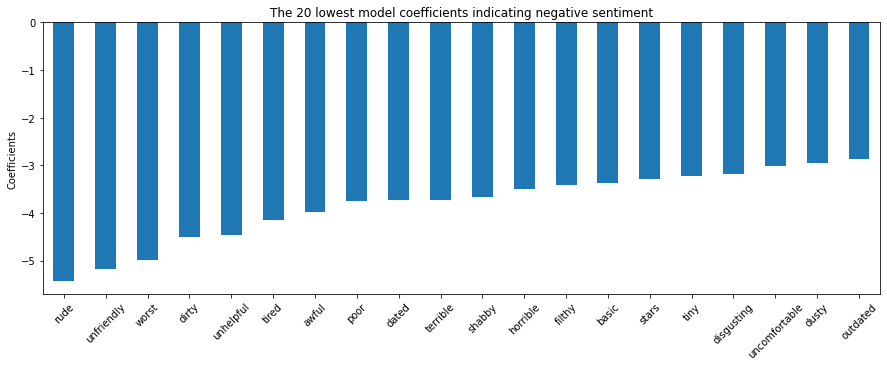

In [117]:
word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()


Decision Tree 

In [118]:
DT_model = DecisionTreeClassifier(max_depth=23).fit(X_train,y_train)
print('The train score is:',DT_model.score(X_train,y_train))
print('The test score is:',DT_model.score(X_test,y_test))

The train score is: 0.7418176481787029
The test score is: 0.6771766491448878


Random Forest

In [121]:
random_forest = RandomForestClassifier()
param_grid = dict(max_depth =[50,60,70])
grid = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7457601135597883
{'max_depth': 70}
RandomForestClassifier(max_depth=70)


In [122]:
random_forest = RandomForestClassifier(max_depth=70).fit(X_train,y_train)
print('The train score is:',random_forest.score(X_train,y_train))
print('The test score is:',random_forest.score(X_test,y_test))

The train score is: 0.9022401319964463
The test score is: 0.7476771303768417


Naive Bayes 

In [123]:
# Bernoulli is suitable for binary feature
nbmodel = BernoulliNB()
nbmodel.fit(X_train,y_train)
print('The train score is:',nbmodel.score(X_train,y_train))
print('The test score is:',nbmodel.score(X_test,y_test))

The train score is: 0.7106469729661125
The test score is: 0.7096875694084549


Use ROC curve to evaluate the models

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

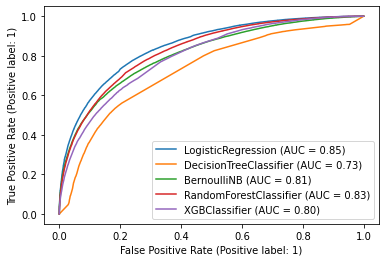

In [124]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(logistic_regression_model, X_test, y_test)
plot_roc_curve(DT_model, X_test, y_test, ax=disp.ax_)
plot_roc_curve(nbmodel, X_test, y_test, ax=disp.ax_)
plot_roc_curve(random_forest, X_test, y_test, ax=disp.ax_)
plot_roc_curve(xgboost_model, X_test, y_test, ax=disp.ax_)


It appears that the Logistic Regression performed the best. Due to computer limitation, I was not able to perform more advanced grid search to improve the accuracy but 85% accuracy is good